In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv("C:/Users/Asus/Downloads/scholarship.csv")

In [6]:
df=data.copy()

In [8]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


C:\Users\Asus\AppData\Local\Temp\ipykernel_14076\1050862703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["semester_percentage"])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\AppData\Local\Temp\ipykernel_14076\1050862703.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

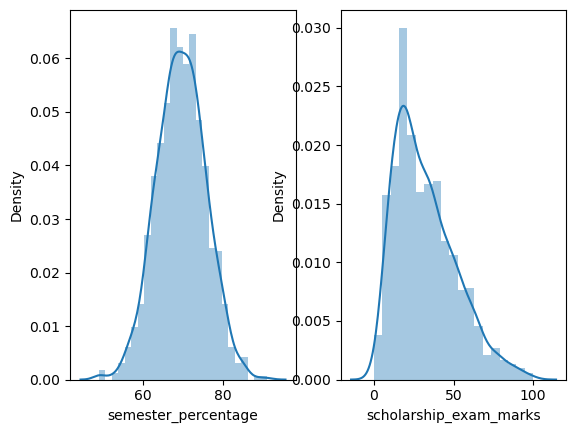

In [10]:
plt.subplot(1,2,1)
sns.distplot(df["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df["scholarship_exam_marks"])

In [65]:
mean=df["semester_percentage"].mean()
std=df["semester_percentage"].std()

In [67]:
print(mean,",",std)

69.6124 , 6.158978751323897


##TRIMMING

In [70]:
Highest_allowed=mean+3*std
Lowest_allowed=mean-3*std

In [72]:
print(Highest_allowed,",",Lowest_allowed)

88.08933625397168 , 51.13546374602831


In [24]:
df[(df["semester_percentage"]<Lowest_allowed) | (df["semester_percentage"]>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [26]:
df[(df["semester_percentage"]>Lowest_allowed) & (df["semester_percentage"]<Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [34]:
df["z-score"]=(df["semester_percentage"]-df["semester_percentage"].mean())/df["semester_percentage"].std()

In [36]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [38]:
df[(df["z-score"]<-3) | (df["z-score"]>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [40]:
df[(df["z-score"]>-3) & (df["z-score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


CAPPING

In [74]:
upper_limit=mean+3*std
lower_limit=mean-3*std

In [76]:
df["semester_percentage"]=np.where(df["semester_percentage"]>upper_limit,upper_limit,
                                    np.where(df["semester_percentage"]<lower_limit,lower_limit,df["semester_percentage"]))

In [78]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.900000,26,1
1,74.600000,38,1
2,75.400000,40,1
3,64.200000,8,1
4,72.300000,17,0
...,...,...,...
995,88.089336,44,1
996,88.089336,65,1
997,51.135464,34,0
998,86.200000,46,1


In [80]:
df[(df["semester_percentage"]<Lowest_allowed) | (df["semester_percentage"]>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship


###USING IQR

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


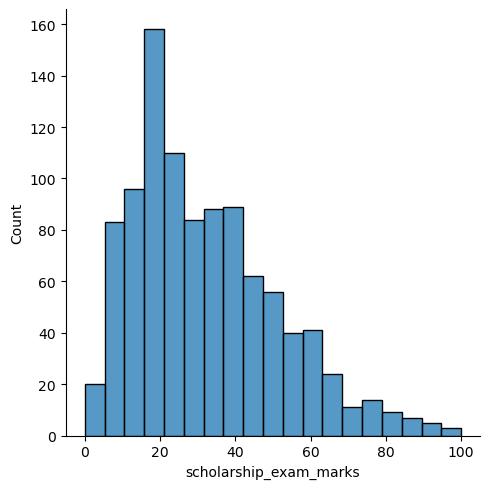

In [84]:
sns.displot(data["scholarship_exam_marks"])

<Axes: >

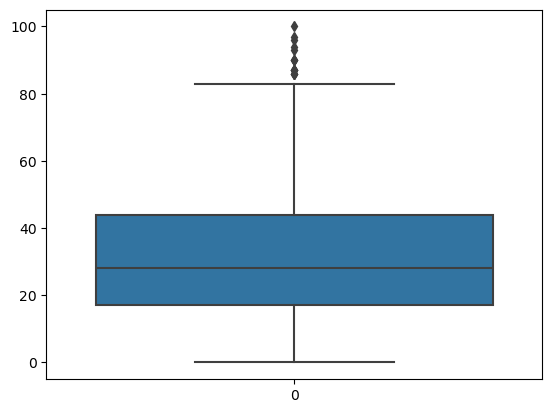

In [86]:
sns.boxplot(data["scholarship_exam_marks"])

In [88]:
Q1=data["scholarship_exam_marks"].quantile(0.25)
Q3=data["scholarship_exam_marks"].quantile(0.75)

In [90]:
Q1

17.0

In [92]:
Q3

44.0

In [94]:
iq=Q3-Q1

In [98]:
min=Q1-1.5*iq
max=Q3+1.5*iq

In [100]:
min

-23.5

In [102]:
max

84.5

In [104]:
data[(data["scholarship_exam_marks"]<min)| data["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


#TRIMMING

In [109]:
new_data=data[(data["scholarship_exam_marks"]>min)& (data["scholarship_exam_marks"]<max)]

C:\Users\Asus\AppData\Local\Temp\ipykernel_14076\1382366095.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\AppData\Local\Temp\ipykernel_14076\1382366095.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simi

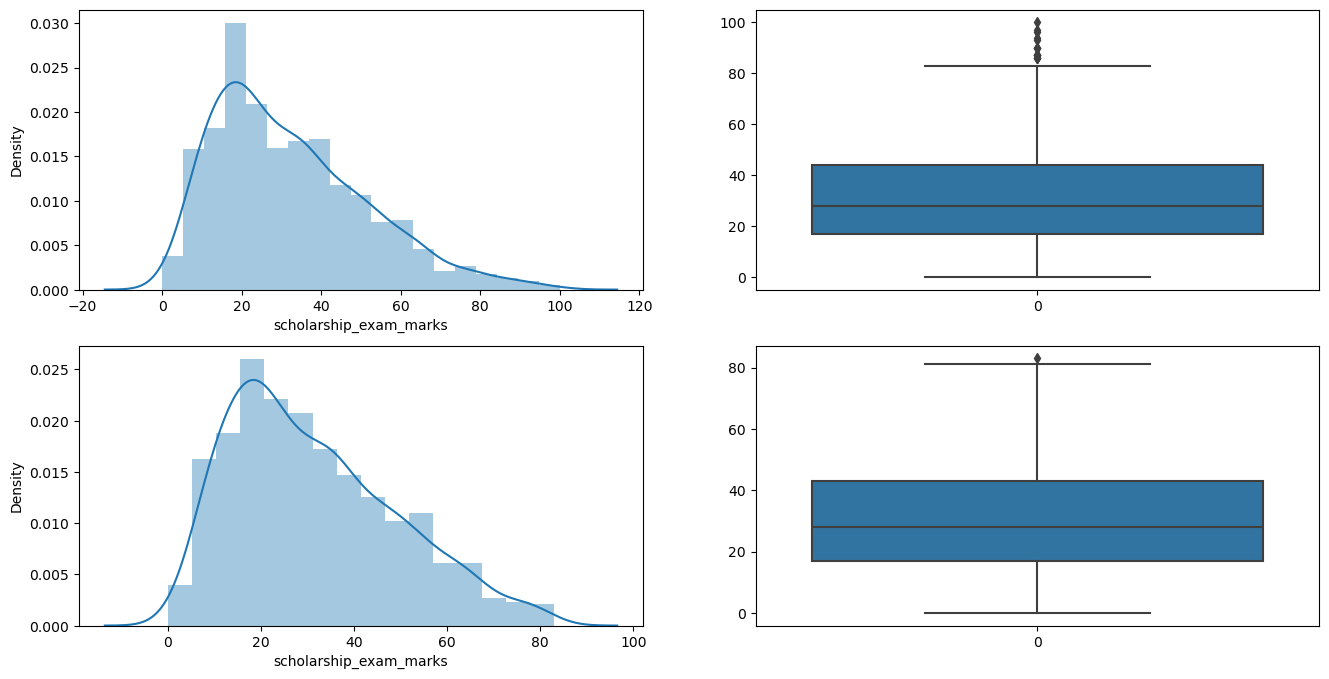

In [113]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])
plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])
plt.show()

Capping

In [120]:
data["scholarship_exam_marks"]=np.where(data["scholarship_exam_marks"]>max,max,
                                        np.where(data["scholarship_exam_marks"]<min,min,data["scholarship_exam_marks"]))

In [124]:
data.shape

(1000, 3)

<Axes: >

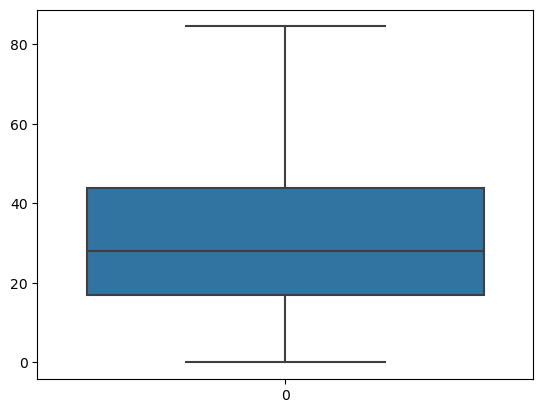

In [128]:
sns.boxplot(data["scholarship_exam_marks"])

In [8]:
df=pd.read_csv("C:/Users/Asus/Downloads/weight-height.csv")

In [10]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\Asus\AppData\Local\Temp\ipykernel_26328\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

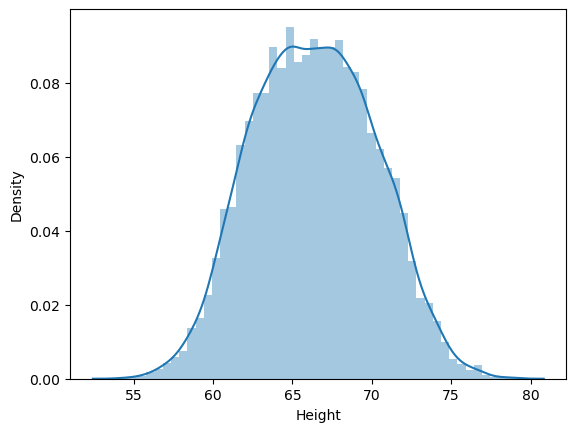

In [12]:
sns.distplot(df["Height"])

<Axes: >

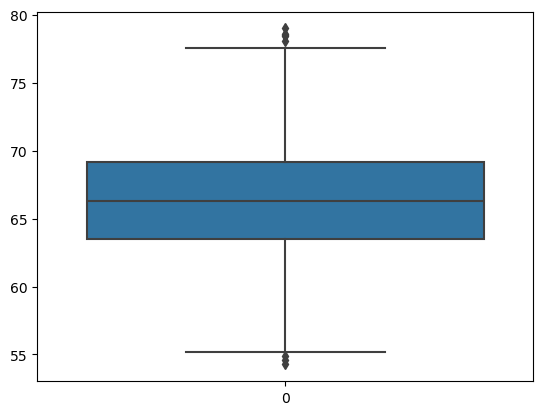

In [14]:
sns.boxplot(df["Height"])

In [16]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [18]:
min_lim=df["Height"].quantile(0.01)
max_lim=df["Height"].quantile(0.99)

In [20]:
min_lim

58.13441158671655

In [22]:
max_lim

74.7857900583366

In [24]:
df[(df["Height"]>max_lim) | (df["Height"]<min_lim)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [26]:
df[(df["Height"]<max_lim) & (df["Height"]>min_lim)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


##TRIMMING

In [29]:
df_new=df[(df["Height"]<max_lim) & (df["Height"]>min_lim)]

<Axes: >

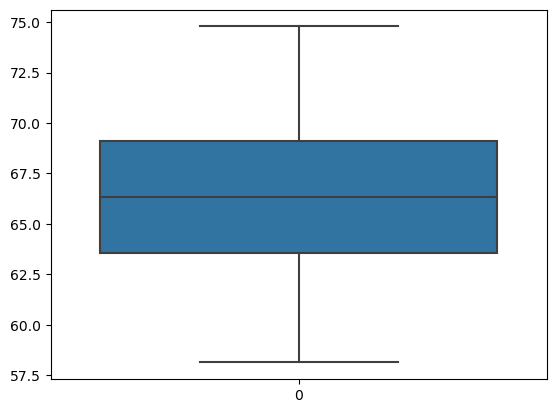

In [33]:
sns.boxplot(df_new["Height"])

#CLAPPING

In [38]:
df["Height"]=np.where(df["Height"]>max_lim,max_lim,np.where(df["Height"]<min_lim,min_lim,df["Height"]))

In [42]:
df.shape

(10000, 3)

<Axes: >

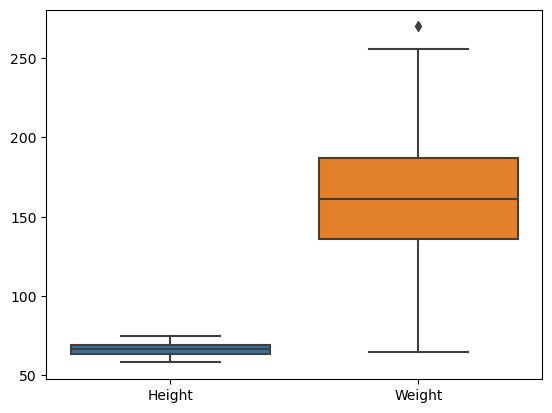

In [44]:
sns.boxplot(df)

<Axes: >

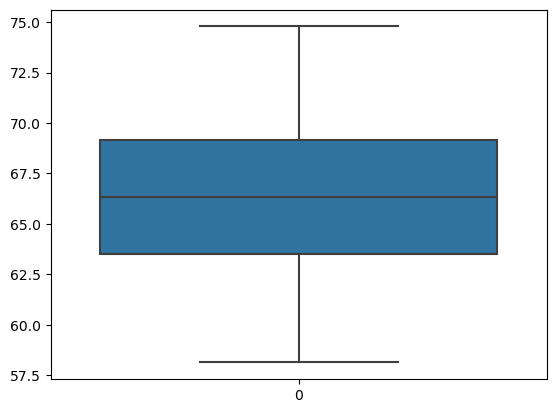

In [46]:
sns.boxplot(df["Height"])